In [4]:
# ! pip install networkx geopandas momepy matplotlib geopy shapely

In [5]:
import networkx as nx
import geopandas
import momepy
import matplotlib.pyplot as plt
from geopy.distance import geodesic
import shapely
import pickle

In [6]:
roads_df  = geopandas.read_file('Tillydrone/roads.geojson')
buildings_df = geopandas.read_file('Tillydrone/buildings.geojson')
schools_df = geopandas.read_file('Tillydrone/schools.geojson')
walk_df = geopandas.read_file('Tillydrone/walk.geojson')
homes_df = geopandas.read_file('Tillydrone/homes.geojson')
landuse_df = geopandas.read_file('Tillydrone/landuse.geojson')

/home/ric/Projects/SpatialPycology/.venv/lib/python3.12/site-packages/pyogrio/raw.py:196: RuntimeWarning: Several features with id = 6226427 have been found. Altering it to be unique. This warning will not be emitted anymore for this layer
  return ogr_read(
/home/ric/Projects/SpatialPycology/.venv/lib/python3.12/site-packages/pyogrio/raw.py:196: RuntimeWarning: Several features with id = 6226427 have been found. Altering it to be unique. This warning will not be emitted anymore for this layer
  return ogr_read(


<Axes: >

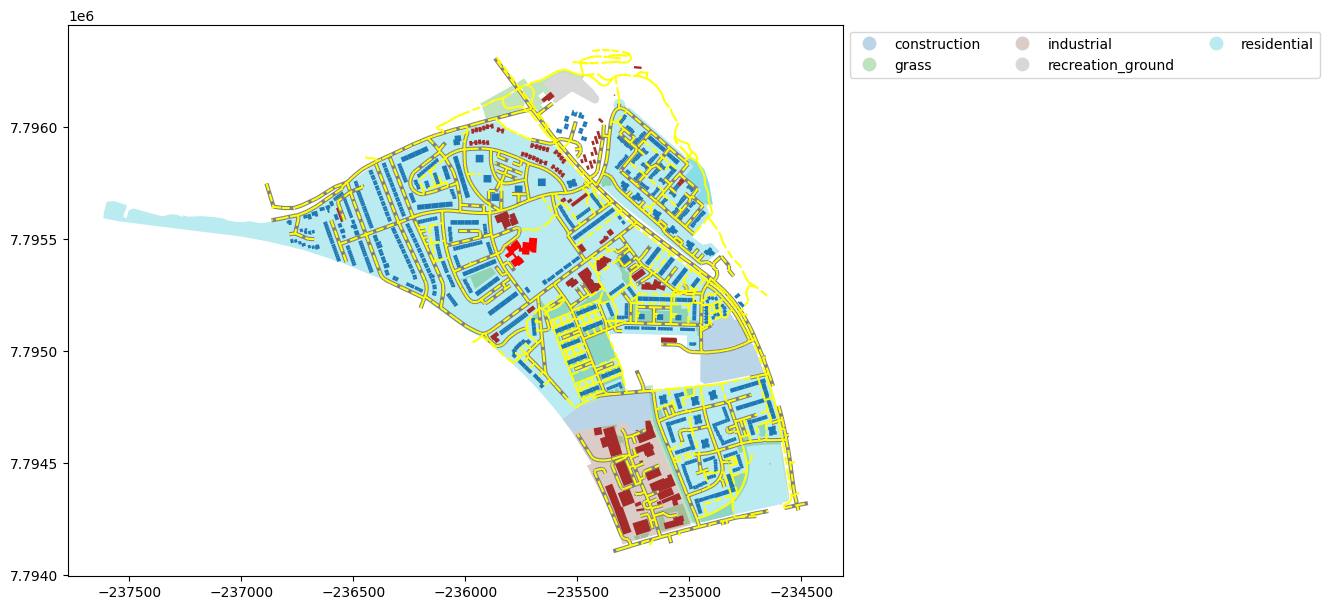

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))
landuse_df.plot(column='landuse',alpha=0.3,ax=ax,legend=True, legend_kwds=dict(loc='upper left', ncol=3, bbox_to_anchor=(1, 1)))
roads_df.plot(ax=ax,linewidth=3,color="gray")
walk_df.plot(ax=ax,color="yellow",linestyle='--')
homes_df.plot(ax=ax)
schools_df.plot(ax=ax,color="red")
buildings_df.plot(ax=ax,color="brown")

In [10]:
buildings_df.head()

,addr:city,addr:country,addr:housenumber,addr:housename,addr:postcode,addr:place,addr:street,email,name,opening_hours,...,tags,osm_type,changeset,centroid_x,centroid_y,road_x,road_y,walk_x,walk_y,geometry
0,None,None,52,None,AB24 2UY,None,Hayton Road,None,Saint George's Tillydrone Church,None,...,"{ ""contact:website"": ""http:\/\/www.saint-georg...",way,None,-235387.091648,7.795392e+06,-235440.724089,7.795418e+06,-235410.892416,7.795409e+06,"POLYGON ((-235351.893 7795394.887, -235359.138..."
1,Aberdeen,GB,None,Tillydrone Community Centre,AB24 2RG,None,Gordon's Mills Road,None,Tillydrone Community Centre,None,...,"{ ""leisure"": ""sports_centre"", ""source:shape"": ...",way,None,-235630.149179,7.796131e+06,-235611.247668,7.796104e+06,-235611.247668,7.796104e+06,"POLYGON ((-235661.436 7796121.059, -235659.976..."
2,Aberdeen,GB,None,None,AB24 2UD,None,Pennan Road,None,Tillydrone Clinic,None,...,"{ ""check_date"": ""2023-05-24"", ""disused:amenity...",way,None,-235226.781554,7.795338e+06,-235235.458820,7.795366e+06,-235235.458820,7.795366e+06,"POLYGON ((-235193.259 7795344.754, -235234.769..."
3,None,None,None,None,None,None,None,None,None,None,...,"{ ""disused"": ""yes"", ""flickr"": ""https:\/\/www.f...",way,None,-235161.044850,7.795289e+06,-235136.356089,7.795327e+06,-235136.356089,7.795327e+06,"POLYGON ((-235145.751 7795278.956, -235148.406..."
4,None,None,None,None,AB24 2TG,None,None,None,Tillydrone Police Office,None,...,"{ ""check_date"": ""2022-08-31"", ""operator:wikida...",way,None,-235091.040251,7.795047e+06,-235066.925789,7.795028e+06,-235066.925789,7.795028e+06,"POLYGON ((-235126.722 7795036.918, -235126.377..."
